In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import pandas as pd
import os
import sys

sys.path.append(os.path.abspath("../.."))
from utils import plot_feature_importances, transform_pred_to_labels, plot_roc_curve, plot_gammaness_distribution, resolution_per_bin, plot_resolution_two_curves

In [2]:
# load rf model
rf_cl = joblib.load('rf_classifier.pkl')
rf_cl_improved = joblib.load('rf_classifier_improved.pkl')

rf_reg = joblib.load('rf_regressor.pkl')
rf_reg_improved = joblib.load('rf_regressor_improved.pkl')

# load CSV with results
results_cl_df = pd.read_csv('rf_results_clf.csv')
results_rg_df = pd.read_csv('rf_results_rg.csv')

/home/user/miniforge3/envs/ctlearn/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/user/miniforge3/envs/ctlearn/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/user/miniforge3/envs/ctlearn/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Decision

Classification Report - Original RF Classifier
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     30642
           1       0.78      0.80      0.79     30642

    accuracy                           0.79     61284
   macro avg       0.79      0.79      0.79     61284
weighted avg       0.79      0.79      0.79     61284

Classification Report - Improved RF Classifier
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     30642
           1       0.78      0.80      0.79     30642

    accuracy                           0.78     61284
   macro avg       0.78      0.78      0.78     61284
weighted avg       0.78      0.78      0.78     61284



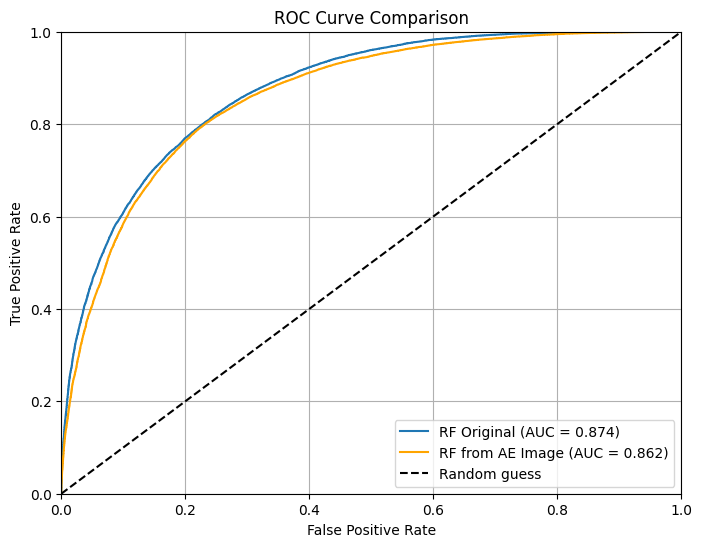

In [3]:
# classification report
y_true = results_cl_df['event_type']
y_pred_original = transform_pred_to_labels(results_cl_df['predicted_proba_original'])
y_pred_improved = transform_pred_to_labels(results_cl_df['predicted_proba_improved'])

print("Classification Report - Original RF Classifier")
print(classification_report(y_true, y_pred_original))
print("Classification Report - Improved RF Classifier")
print(classification_report(y_true, y_pred_improved))

plot_roc_curve(y_true, results_cl_df['predicted_proba_original'], results_cl_df['predicted_proba_improved'], label1="RF Original", label2="RF from AE Image")

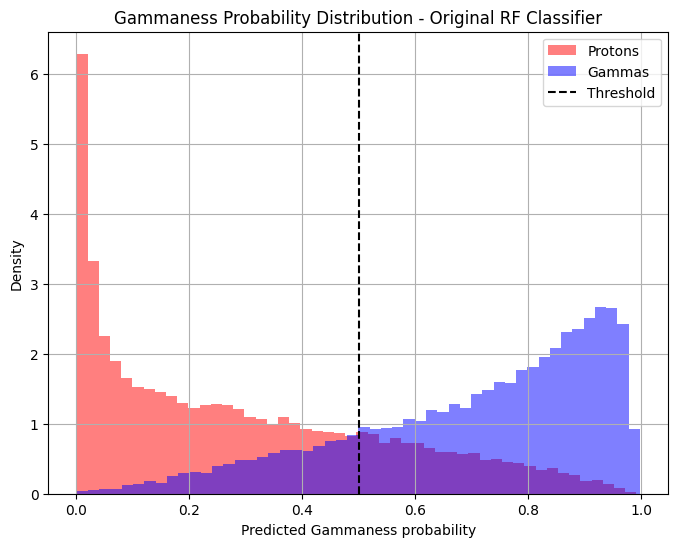

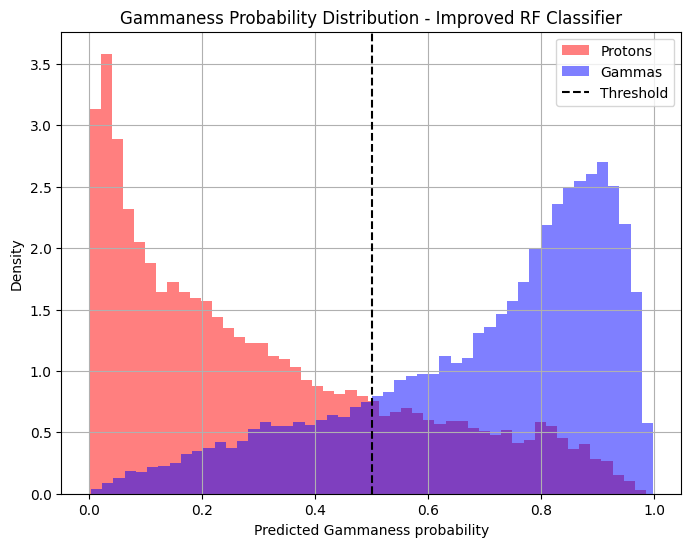

In [4]:
plot_gammaness_distribution(y_true, results_cl_df['predicted_proba_original'], threshold=0.5, title="Gammaness Probability Distribution - Original RF Classifier")
plot_gammaness_distribution(y_true, results_cl_df['predicted_proba_improved'], threshold=0.5, title="Gammaness Probability Distribution - Improved RF Classifier")

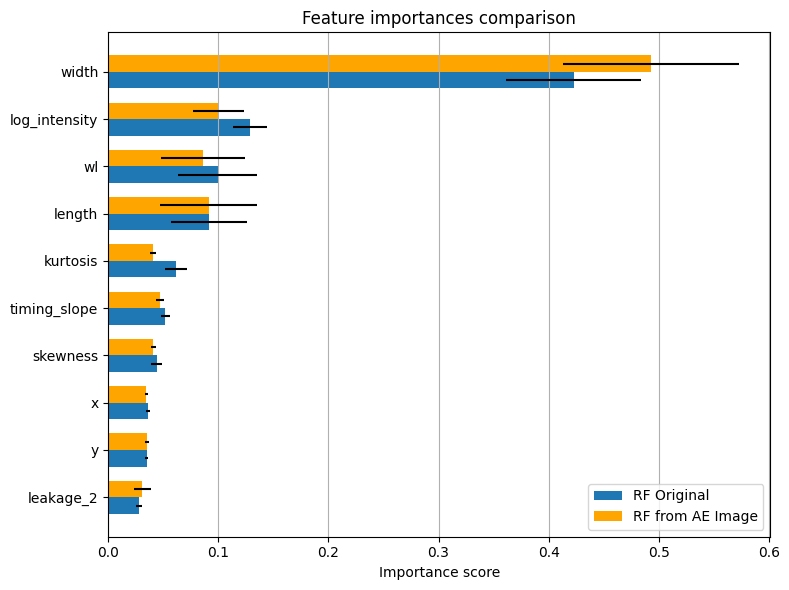

In [5]:
# Show feature importance
feature_names = ['log_intensity', 'width', 'length', 'wl', 'skewness','kurtosis', 'leakage_2', 'x', 'y', 'timing_slope']

plot_feature_importances(rf_cl, rf_cl_improved, features=feature_names)

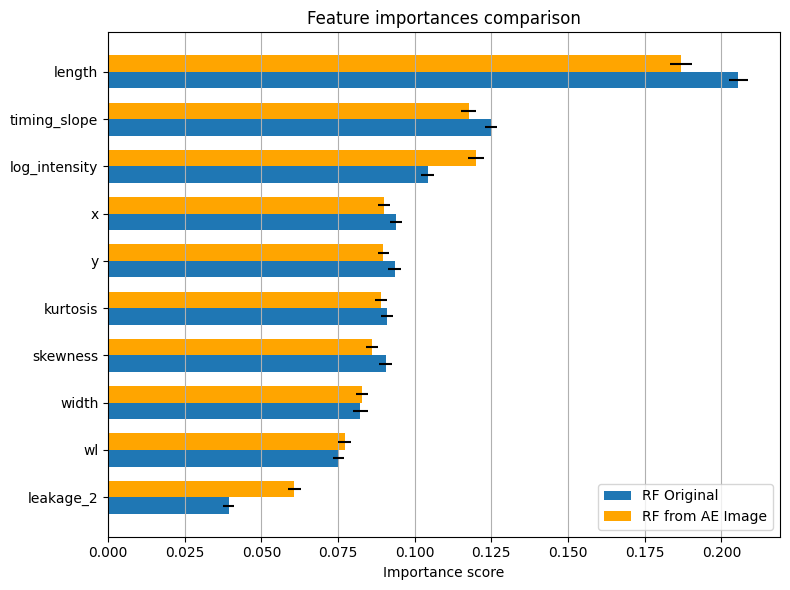

In [6]:
plot_feature_importances(rf_reg, rf_reg_improved, features=feature_names)

In [7]:
x_bins, res = resolution_per_bin(results_rg_df['true_energy'], results_rg_df['true_energy'], results_rg_df['predicted_energy_original'], relative_scaling_method='s1', bins=10)
x_bins_improved, res_improved = resolution_per_bin(results_rg_df['true_energy'], results_rg_df['true_energy'], results_rg_df['predicted_energy_improved'], relative_scaling_method='s1', bins=10)

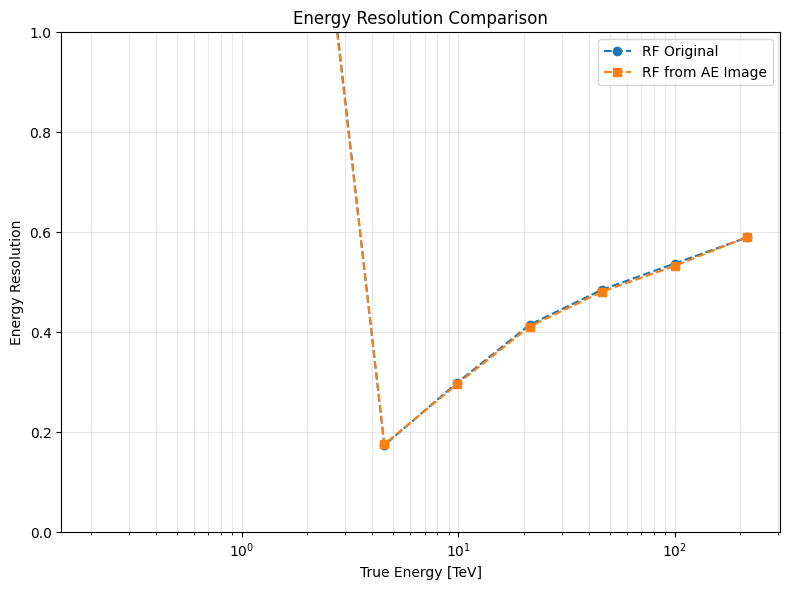

In [8]:
plot_resolution_two_curves(
    x_bins, res,
    x_bins_improved, res_improved,
    label1="RF Original",
    label2="RF from AE Image",
    xlabel="True Energy [TeV]",
    ylabel="Energy Resolution"
)